In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

import json
import sys   

from datetime import datetime
from dateutil import parser

In [2]:
with open("battles_temp.json", "r") as f:
    print(sum(1 for row in f))

120004


In [30]:
data = []
with open("battles_temp.json", 'r') as f:
    for idx, line in enumerate(f):
#         if idx == 115152:
#             print (line[7500:7600])
        try:
            data.append(json.loads(line))
#             if idx == 120000:
#                 print("done")
#                 break
        except Exception as e:
            print(e)
            print(idx)
            break

In [32]:
battles_df = pd.DataFrame(data)
battles_df

,arena,challengeType,deckType,mode,opponent,opponentCrowns,team,teamCrowns,teamSize,tournamentTag,type,utcTime,winCountBefore,winner
0,{'name': 'Clan League'},None,slotDeck,"{'id': 72000066, 'name': 'Showdown_Ladder'}","[{'tag': 'CUL0J2GR', 'name': 'Yung Lord!', 'cr...",1,"[{'tag': '8QPQCJ80R', 'name': 'zoko', 'crownsE...",0,1,NaN,clanWarWarDay,1539049935,NaN,-1
1,"{'name': 'Spell Valley', 'arena': 'Arena 5', '...",None,draft,"{'name': 'DraftMode', 'deck': 'Draft', 'cardLe...","[{'tag': 'Y8922G0', 'name': 'izzy', 'crownsEar...",1,"[{'tag': '8QPQCJ80R', 'name': 'zoko', 'crownsE...",3,1,NaN,clanWarCollectionDay,1538963279,NaN,2
2,"{'name': 'Royal Arena', 'arena': 'Arena 7', 'a...",None,predefined,"{'id': 72000087, 'name': 'ClassicDecks_Friendly'}","[{'tag': 'LLLQQJ8', 'name': 'kinosor', 'crowns...",1,"[{'tag': '8QPQCJ80R', 'name': 'zoko', 'crownsE...",0,1,NaN,clanWarCollectionDay,1538963059,NaN,-1
3,"{'name': 'Royal Arena', 'arena': 'Arena 7', 'a...",None,draft,"{'name': 'DraftMode', 'deck': 'Draft', 'cardLe...","[{'tag': 'QPYQ82RQ', 'name': 'TheIchiGamerr', ...",0,"[{'tag': '8QPQCJ80R', 'name': 'zoko', 'crownsE...",3,1,NaN,clanWarCollectionDay,1538962842,NaN,3
4,"{'name': 'Jungle Arena', 'arena': 'Arena 9', '...",None,slotDeck,"{'name': 'TeamVsTeamLadder', 'deck': 'Collecti...","[{'tag': 'PYPVQ2V0', 'name': '-=alvin=-', 'cro...",0,"[{'tag': '9PU88YCYU', 'name': 'q ............'...",3,2,NaN,2v2,1538893590,NaN,3
5,"{'name': 'Spell Valley', 'arena': 'Arena 5', '...",None,slotDeck,"{'name': 'TeamVsTeamLadder', 'deck': 'Collecti...","[{'tag': '2VGG8G9U', 'name': 'Blueflu32', 'cro...",2,"[{'tag': '8QPQCJ80R', 'name': 'zoko', 'crownsE...",1,2,NaN,2v2,1538893494,NaN,-1
6,"{'name': 'Builder's Workshop', 'arena': 'Arena...",unknown:73001574,eventDeck,"{'id': 72000080, 'name': 'Event_NewArena6'}","[{'tag': 'P80LVPVC', 'name': 'musa', 'crownsEa...",0,"[{'tag': '8QPQCJ80R', 'name': 'zoko', 'crownsE...",1,1,NaN,challenge,1538893226,2.0,1
7,"{'name': 'Builder's Workshop', 'arena': 'Arena...",unknown:73001574,eventDeck,"{'id': 72000080, 'name': 'Event_NewArena6'}","[{'tag': '8CU9QRCCU', 'name': 'Diego González'...",0,"[{'tag': '8QPQCJ80R', 'name': 'zoko', 'crownsE...",1,1,NaN,challenge,1538892982,1.0,1
8,"{'name': 'Builder's Workshop', 'arena': 'Arena...",unknown:73001574,eventDeck,"{'id': 72000080, 'name': 'Event_NewArena6'}","[{'tag': '2LVRRPPGJ', 'name': 'novita', 'crown...",0,"[{'tag': '8QPQCJ80R', 'name': 'zoko', 'crownsE...",1,1,NaN,challenge,1538892782,NaN,1
9,"{'name': 'Builder's Workshop', 'arena': 'Arena...",unknown:73001574,eventDeck,"{'id': 72000080, 'name': 'Event_NewArena6'}","[{'tag': '8080VY2RU', 'name': '~GZ.Pitt Bull~'...",1,"[{'tag': '8QPQCJ80R', 'name': 'zoko', 'crownsE...",0,1,NaN,challenge,1538892576,NaN,-1


(0, 7100)

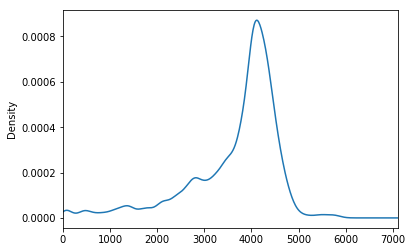

In [34]:
## show trophies distribution
# battles_df = pd.read_json("C:/Users/Jiahong Xue/Desktop/Projects/Clash-Royale-Card-Usage-Analysis/battles_temp.json", lines=True)
# the above line somehow gives me osERROR. I searched for it. It is likely an error for python 3.6.x running on windows. I also tested this line for a smaller file size which runs just fine.

battles_df.opponent[battles_df.opponent.apply(lambda x:"startTrophies" in x[0].keys())].apply(lambda x:x[0]["startTrophies"]).sort_values().plot(kind = "kde")
plt.xlim(0,7100)
plt.title("Trophies density distribution")

In [37]:
# battle types.
battles_df.type.value_counts()

PvP                     51326
2v2                     34815
challenge               19924
clanWarCollectionDay     7969
clanWarWarDay            2505
clanMate                 1261
friendly                 1005
tournament                949
clanMate2v2               220
challenge2v2               29
Name: type, dtype: int64

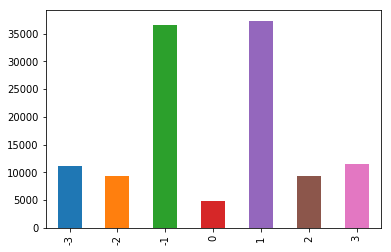

In [53]:
battles_df.winner.value_counts().sort_index().plot(kind = 'bar');

In [114]:
# PVP
PVP_battles_df = battles_df[battles_df.type == "PvP"]
PVP_battles_df.reset_index().drop("index", axis = 1)

,arena,challengeType,deckType,mode,opponent,opponentCrowns,team,teamCrowns,teamSize,tournamentTag,type,utcTime,winCountBefore,winner
0,"{'name': 'Legendary Arena', 'arena': 'Arena 12...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '9C2CUUYJJ', 'name': 'IGOR', 'crownsE...",2,"[{'tag': '88YJLQ89J', 'name': 'hanel the king'...",1,1,NaN,PvP,1538848966,NaN,-1
1,"{'name': 'Legendary Arena', 'arena': 'Arena 12...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '8CQYYCYLU', 'name': '✌God_Master#2✌'...",0,"[{'tag': 'CPL09LRL', 'name': 'm3ndonca', 'crow...",1,1,NaN,PvP,1539100252,NaN,1
2,"{'name': 'Legendary Arena', 'arena': 'Arena 12...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '9PC9LQYRP', 'name': 'MaNa', 'crownsE...",1,"[{'tag': 'CPL09LRL', 'name': 'm3ndonca', 'crow...",0,1,NaN,PvP,1539089628,NaN,-1
3,"{'name': 'Electro Valley', 'arena': 'Arena 11'...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '2RLU0RQVL', 'name': 'NightZeus', 'cr...",1,"[{'tag': 'PJC8GR9J', 'name': 'enzo', 'crownsEa...",2,1,NaN,PvP,1539117923,NaN,1
4,"{'name': 'Electro Valley', 'arena': 'Arena 11'...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '28GUP9JGL', 'name': 'lolcat15', 'cro...",3,"[{'tag': 'PJC8GR9J', 'name': 'enzo', 'crownsEa...",0,1,NaN,PvP,1539117681,NaN,-3
5,"{'name': 'Electro Valley', 'arena': 'Arena 11'...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '8RV08CG8G', 'name': 'Lu21', 'crownsE...",1,"[{'tag': 'PJC8GR9J', 'name': 'enzo', 'crownsEa...",3,1,NaN,PvP,1539117488,NaN,2
6,"{'name': 'Electro Valley', 'arena': 'Arena 11'...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '2UJYPQR0U', 'name': 'thelegend27', '...",1,"[{'tag': 'PJC8GR9J', 'name': 'enzo', 'crownsEa...",2,1,NaN,PvP,1539117318,NaN,1
7,"{'name': 'Legendary Arena', 'arena': 'Arena 12...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '2VPPCQGY2', 'name': 'DeMoTiX', 'crow...",2,"[{'tag': 'PJC8GR9J', 'name': 'enzo', 'crownsEa...",1,1,NaN,PvP,1539117112,NaN,-1
8,"{'name': 'Legendary Arena', 'arena': 'Arena 12...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '2PPPJ2YLY', 'name': 'dejan', 'crowns...",3,"[{'tag': 'PJC8GR9J', 'name': 'enzo', 'crownsEa...",1,1,NaN,PvP,1539116871,NaN,-2
9,"{'name': 'Legendary Arena', 'arena': 'Arena 12...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '8GLL98QQL', 'name': 'Hellexia', 'cro...",1,"[{'tag': 'PJC8GR9J', 'name': 'enzo', 'crownsEa...",0,1,NaN,PvP,1539116760,NaN,-1


In [127]:
PVP_battles_df.drop(42,axis=0,inplace = True)
# somehow this row has has PVP type but 2 opponent data. Which is not True for PVP battle

KeyError: '[42] not found in axis'

In [144]:
pd.DataFrame(PVP_battles_df.opponent.iloc[0:1].values[0]).columns

Index(['clan', 'crownsEarned', 'deck', 'deckLink', 'name', 'startTrophies',
       'tag', 'trophyChange'],
      dtype='object')

In [151]:
#expand a list column to 
pd.DataFrame(PVP_battles_df.opponent.apply(lambda x:x[0]).values.tolist())

#pd.DataFrame(opponent_list)

,clan,crownsEarned,deck,deckLink,name,startTrophies,tag,trophyChange
0,"{'tag': '9Q0GLP2L', 'name': 'team prolegends',...",0,"[{'name': 'Mega Knight', 'level': 1, 'maxLevel...",https://link.clashroyale.com/deck/en?deck=2600...,✌God_Master#2✌,3760.0,8CQYYCYLU,-24.0
1,"{'tag': '9PU882V2', 'name': 'quebec', 'badge':...",1,"[{'name': 'Balloon', 'level': 6, 'maxLevel': 8...",https://link.clashroyale.com/deck/en?deck=2600...,MaNa,3799.0,9PC9LQYRP,30.0
2,"{'tag': 'VJGU8R2', 'name': 'porrón frio', 'bad...",1,"[{'name': 'Goblin Barrel', 'level': 4, 'maxLev...",https://link.clashroyale.com/deck/en?deck=2800...,NightZeus,3774.0,2RLU0RQVL,-27.0
3,"{'tag': 'P08RC288', 'name': 'the daddies', 'ba...",3,"[{'name': 'P.E.K.K.A', 'level': 5, 'maxLevel':...",https://link.clashroyale.com/deck/en?deck=2600...,lolcat15,3761.0,28GUP9JGL,32.0
4,"{'tag': '9YQRPPUY', 'name': 'COCAINCA PERU', '...",1,"[{'name': 'Poison', 'level': 4, 'maxLevel': 8,...",https://link.clashroyale.com/deck/en?deck=2800...,Lu21,3755.0,8RV08CG8G,-26.0
5,"{'tag': '8VLYPYL', 'name': 'habs', 'badge': {'...",1,"[{'name': 'Executioner', 'level': 6, 'maxLevel...",https://link.clashroyale.com/deck/en?deck=2600...,thelegend27,3736.0,2UJYPQR0U,-27.0
6,"{'tag': 'U9LRRU2', 'name': 'Nova Dúk3$', 'badg...",2,"[{'name': 'Tesla', 'level': 11, 'maxLevel': 13...",https://link.clashroyale.com/deck/en?deck=2700...,DeMoTiX,3767.0,2VPPCQGY2,28.0
7,"{'tag': '289C2P8', 'name': 'clan faraon', 'bad...",3,"[{'name': 'Bats', 'level': 11, 'maxLevel': 13,...",https://link.clashroyale.com/deck/en?deck=2600...,dejan,3772.0,2PPPJ2YLY,30.0
8,"{'tag': 'PPQL999V', 'name': 'El Prado', 'badge...",1,"[{'name': 'Miner', 'level': 2, 'maxLevel': 5, ...",https://link.clashroyale.com/deck/en?deck=2600...,Hellexia,3799.0,8GLL98QQL,30.0
9,"{'tag': '9U829C9P', 'name': 'Brazzers team', '...",1,"[{'name': 'Lumberjack', 'level': 1, 'maxLevel'...",https://link.clashroyale.com/deck/en?deck=2600...,Светля4ок,3767.0,2928082LU,-25.0
